
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

EDA Analysis on Dataset

<Axes: >

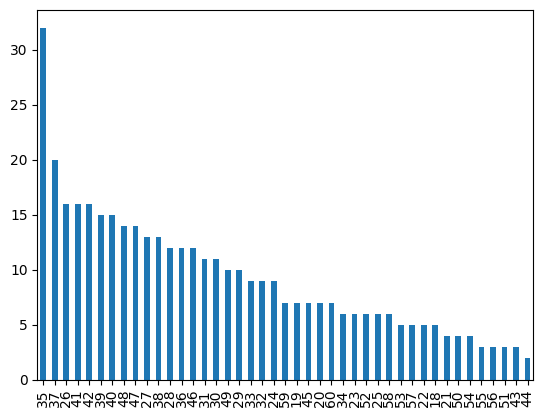

In [6]:
df['Age'].value_counts().plot(kind='bar')

<ipython-input-7-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

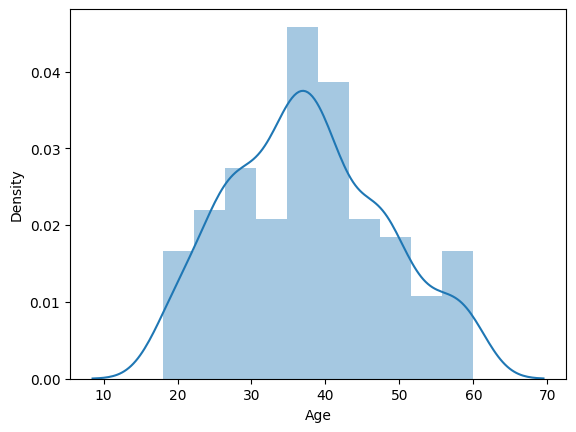

In [7]:

sns.distplot(df['Age'])

<ipython-input-8-cca866f85a80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

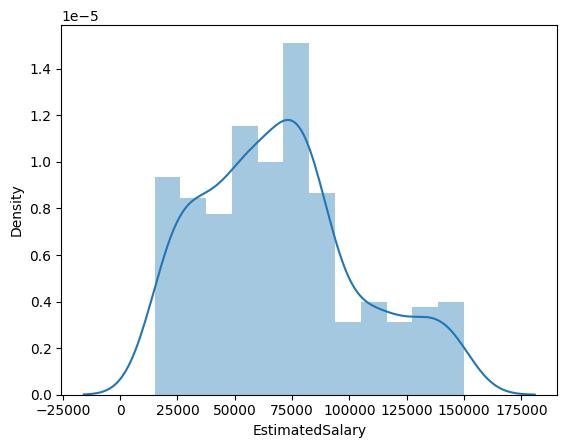

In [8]:

sns.distplot(df['EstimatedSalary'])

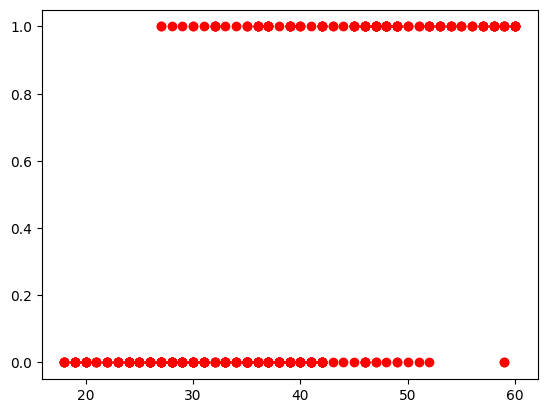

In [9]:
plt.scatter(df.Age,df.Purchased,color='red')

<Axes: xlabel='Age', ylabel='Count'>

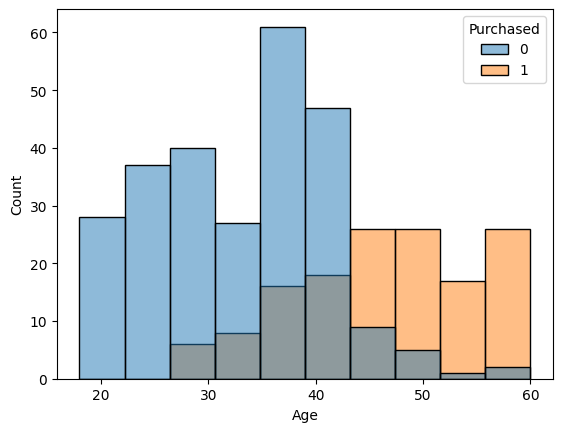

In [10]:


sns.histplot(x=df['Age'], hue=df['Purchased'])


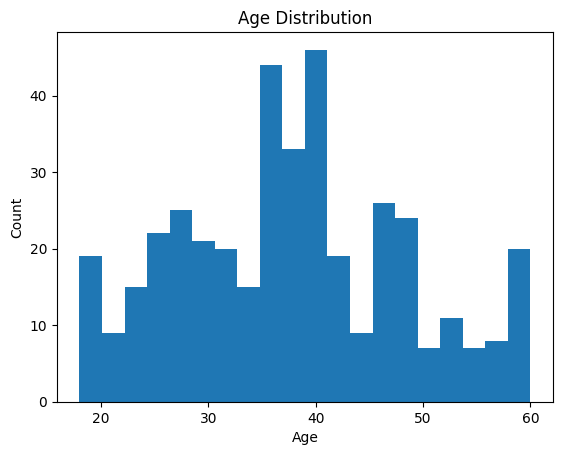

In [11]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

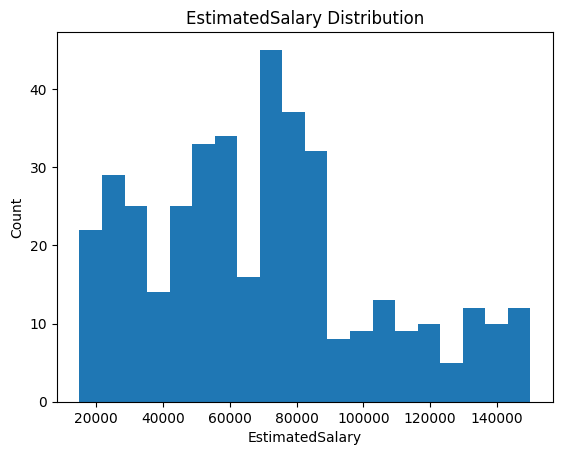

In [12]:
plt.hist(df['EstimatedSalary'], bins=20)
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test ,y_train, y_test=train_test_split(df[['Age']],df.Purchased,train_size=0.9)

In [15]:
X_train

,Age
356,54
121,37
311,39
282,37
350,38
...,...
194,28
228,40
156,46
373,59


In [16]:
X_test

,Age
306,51
303,37
331,48
187,33
45,23
255,52
25,47
128,30
253,37
192,29


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [21]:
#heance it predict that age greater than 45 are not purchasing likely

In [22]:
X_test

,Age
306,51
303,37
331,48
187,33
45,23
255,52
25,47
128,30
253,37
192,29


In [23]:

model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [24]:


prediction = model.predict(X_test)
predictionData = {"Prediction":prediction, "Actual":y_test}
predictionData = pd.DataFrame(predictionData)
predictionData.sample(5)

,Prediction,Actual
204,1,1
253,0,1
81,0,0
46,0,0
280,1,1


Matrices
Recall
Precision
Confusion Matrix


In [25]:

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

CONFUSION MATRIX

In [26]:

confusion_matrix(y_test.values, prediction)

array([[21,  1],
       [ 5, 13]])

ACCURACY SCORE

In [27]:

accuracy_score(y_test, prediction)
     

0.85

PREDICTION SCORE

In [28]:

precision_score(y_test, prediction)

0.9285714285714286

RECALL SCORE

In [29]:
recall_score(y_test, prediction)

0.7222222222222222

ERROR RATE

In [30]:

error_rate = 1- accuracy_score(y_test, prediction)
     

In [31]:

error_rate*100
     

15.000000000000002